# Twitter Hate Speech Analysis Task

### Install and upgrade necessary libraries and modules in root directory

In [ ]:
# !pip install -U contractions
# !pip install -U unidecode
#!pip install -U pip setuptools wheel spacy[lookups,transformers] 
#!pip install pyversions

### Preferred user settings and options in Jupyter Notebook

In [ ]:
# set up display area to show dataframe in jupyter qtconsole
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option("display.precision", 2)

# display all text in a pandas cell without truncation
pd.set_option('display.max_colwidth', None) 

# suppress/disable all warnings in the current script/notebook. No warnings will be printed from now on
import warnings
warnings.filterwarnings('ignore')

# enable inline plotting so the plots/graphs are displayed just below the cell where your plotting commands are written
%matplotlib inline  

# display html in jupyter notebook
from IPython.display import display, HTML

SEED=42

### Import necessary libraries and modules into Jupyter Session

In [1]:
import sklearn
import numpy as np
import pandas as pd

### Date and Versions of imported libraries in current session

In [20]:
import datetime
now = datetime.datetime.now()
#print("Creation date and time:{}".format(now))
print("Creation date and EST time: '2022-09-10 15:47:06.907110'")
print()
print("Versions of libraries and modules")
print("------------------------------------")
import pyversions
from pyversions import versions
vs = pyversions.versions()                                  
versions();  # semicolon to avoid printing information twice

Creation date and EST time: '2022-09-10 15:47:06.907110'

Versions of libraries and modules
------------------------------------
Windows 10 64-bit 10.0.22000
CPython 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Sep 10 2022, 15:48:42

Module          Version
ipython           8.4.0
jupyterlab        3.3.2
notebook         6.4.11
numpy            1.21.5
pandas            1.4.3
pyversions        0.0.3
sklearn           1.0.2
Windows 10 64-bit 10.0.22000
CPython 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Sep 10 2022, 15:48:42

Module          Version
ipython           8.4.0
jupyterlab        3.3.2
notebook         6.4.11
numpy            1.21.5
pandas            1.4.3
pyversions        0.0.3
sklearn           1.0.2


### Load CSV dataset to Pandas DataFrame

In [22]:
# Read a comma-separated values (csv) file into Python Pandas DataFrame and assign it to a variable
# training data
train = pd.read_csv("C:/Users/hubert foy/anaconda3/envs/ePortolio Notebooks-HFOY/Twitter-Hate-Sentiment-Analysis-master/train.csv")

# test data
test = pd.read_csv("C:/Users/hubert foy/anaconda3/envs/ePortolio Notebooks-HFOY/Twitter-Hate-Sentiment-Analysis-master/test.csv")

# print first five rows of train data set
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [75]:
test.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,to find
1,31964,@user #white #supremacists want everyone to s...,want everyone to see the new and heres why
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd to my amazing hilarious eli ahmir uncle dav...


OBSERVATION:
- Notice how there exist special characters like @, #, !, and etc. We will remove these characters later in the data cleaning step. 
- Check if there are any missing values. There were no missing values for both training and test data.

# Understanding the dataset

In [24]:
# print the shape of the dataset
print("There are {} observations and {} features in the train dataset. \n".format(train.shape[0],train.shape[1]))


There are 31962 observations and 3 features in the train dataset. 



In [27]:
# Print a concise summary of the DataFrame 'tweet'
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [28]:
# Print a concise summary of the DataFrame 'tweet'
train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [29]:
# Check for NUL values
train.isnull().sum(axis=0)

id       0
label    0
tweet    0
dtype: int64

In [31]:
train.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [32]:
train.columns

Index(['id', 'label', 'tweet'], dtype='object')

# Data Exploration (Exploratory Data Analysis)

In [33]:
# Check for duplicate rows
duplicateRowsDF = train[train.duplicated()]
print(duplicateRowsDF.head())

Empty DataFrame
Columns: [id, label, tweet]
Index: []


In [35]:
print(duplicateRowsDF.shape)  
# zero duplicated cell for all three columns and all rows

(0, 3)


In [36]:
# Check for NUL values
train.isnull().sum(axis=0)

id       0
label    0
tweet    0
dtype: int64

In [37]:
# non-racist/sexist related tweets
sum(train["label"] == 0)

29720

In [38]:
# racist/sexist related tweets
sum(train["label"] == 1)

2242

In [40]:
# check if there are any missing values
train.isnull().sum()
#train.isnull().values.any()

id       0
label    0
tweet    0
dtype: int64

In [42]:
train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


### Word cloud graph of tweets for negative sentiment

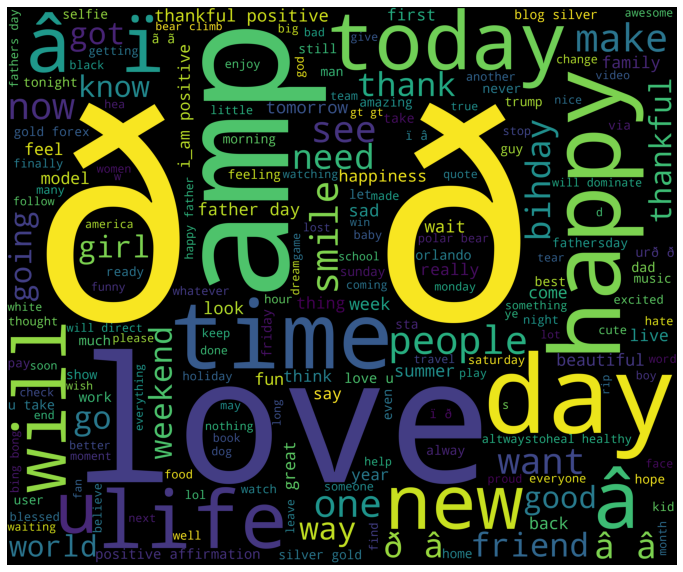

In [72]:
import matplotlib.pyplot as plt  
from wordcloud import WordCloud,STOPWORDS
airline_tweets=train[train['tweet']=='negative']
words = ' '.join(train['tweet'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Word cloud graph of tweets for positive sentiment

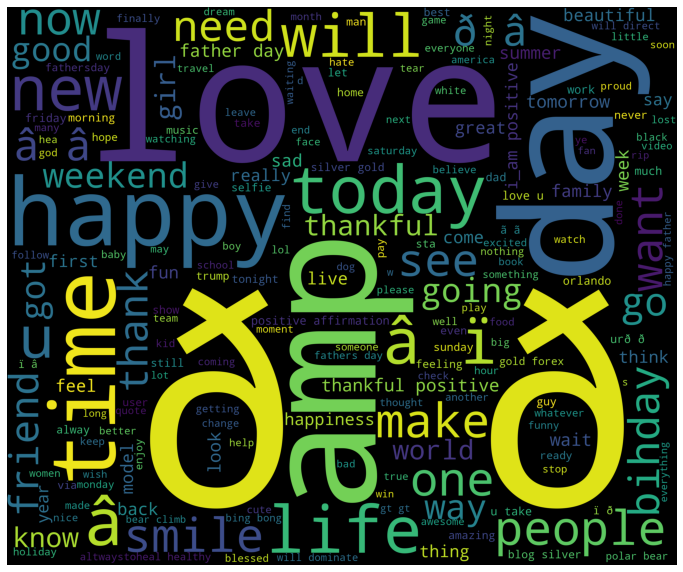

In [73]:
# import matplotlib.pyplot as plt  
# Word cloud graph of tweets for positive sentiment
airline_tweets=train[train['tweet']=='positive']
words = ' '.join(train['tweet'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Data cleaning
- We will clean the data using the tweet-preprocessor library. Here's the link: https://pypi.org/project/tweet-preprocessor/

- This library removes URLs, Hashtags, Mentions, Reserved words (RT, FAV), Emojis, and Smileys.

- We will also use the regular expression library to remove other special cases that the tweet-preprocessor library didn't have.

In [44]:
#install tweet-preprocessor to clean tweets
#!pip install tweet-preprocessor

In [45]:
# remove special characters using the regular expression library
import re

#set up punctuations we want to be replaced
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [47]:
import preprocessor as p

# define custum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_tweets(df):
  tempArr = []
  for line in df:
    # send to tweet_processor
    tmpL = p.clean(line)
    # remove puctuation
    tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
    tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
    tempArr.append(tmpL)
  return tempArr

In [48]:
# clean training data
train_tweet = clean_tweets(train["tweet"])
train_tweet = pd.DataFrame(train_tweet)

In [49]:
# append cleaned tweets to the training data
train["clean_tweet"] = train_tweet

# compare the cleaned and uncleaned tweets
train.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for credit i cant use cause they dont o...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now
5,6,0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare and big talking before they ...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here im its so


In [50]:
# clean the test data and append the cleaned tweets to the test data
test_tweet = clean_tweets(test["tweet"])
test_tweet = pd.DataFrame(test_tweet)
# append cleaned tweets to the training data
test["clean_tweet"] = test_tweet

# compare the cleaned and uncleaned tweets
test.tail()

,id,tweet,clean_tweet
17192,49155,thought factory: left-right polarisation! #tru...,thought factory left right polarisation &gt3
17193,49156,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,today in omg &amp used words like assets&ampli...
17195,49158,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads t...
17196,49159,"my song ""so glad"" free download! #shoegaze ...",my song so glad free download


# Test and Train split


In [52]:
from sklearn.model_selection import train_test_split

# extract the labels from the train data
y = train.label.values

# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(train.clean_tweet.values, y, 
                                                    stratify=y, 
                                                    random_state=1, 
                                                    test_size=0.3, shuffle=True)

# Vectorize tweets using CountVectorizer

- Now, we will convert text into numeric form as our model won't be able to understand the human language. We will vectorize the tweets using CountVectorizer. CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words. 

- For example, let's say we have a list of text documents like below. 

- CountVectorizer combines all the documents and tokenizes them. Then it counts the number of occurrences from each document. The results are shown below.

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
documents = ["This is Import Data's Youtube channel",
             "Data science is my passion and it is fun!",
             "Please subscribe to my channel"]

# initializing the countvectorizer
vectorizer = CountVectorizer()

# tokenize and make the document into a matrix
document_term_matrix = vectorizer.fit_transform(documents)

# check the result
pd.DataFrame(document_term_matrix.toarray(), columns = vectorizer.get_feature_names_out())

,and,channel,data,fun,import,is,it,my,passion,please,science,subscribe,this,to,youtube
0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1
1,1,0,1,1,0,2,1,1,1,0,1,0,0,0,0
2,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0


In [62]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(x_train) + list(x_test))

# transform documents to document-term matrix
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)

# Model building
- Now that we have vectorized all the tweets, we will build a model to classify the test data. 
- We will use a supervised learning algorithm, Support Vector Classifier (SVC). It is widely used for binary classifications and multi-class classifications.
- You can find more explanation on the scikit-learn documentation page: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [63]:
from sklearn import svm
# classify using support vector classifier
svm = svm.SVC(kernel = 'linear', probability=True)

# fit the SVC model based on the given training data
prob = svm.fit(x_train_vec, y_train).predict_proba(x_test_vec)

# perform classification and prediction on samples in x_test
y_pred_svm = svm.predict(x_test_vec)

# Accuracy score for SVC


In [74]:
from sklearn.metrics import accuracy_score
print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%')

Accuracy score for SVC is:  94.86912086766085 %


- And here we go! The accuracy turned out to be 95%!